In [109]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import strlearn as sl
from strlearn.ensembles import SEA
from sklearn.naive_bayes import GaussianNB
clf = SEA(base_estimator=GaussianNB())

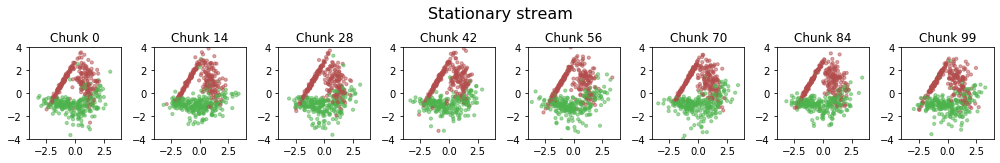

In [127]:
from strlearn.streams import StreamGenerator

concept_kwargs = {
    "n_chunks": n_chunks,
    "chunk_size": 500,
    "n_classes": 2,
    "random_state": 106,
    "n_features": 2,
    "n_informative": 2,
    "n_redundant": 0,
    "n_repeated": 0,
}

stream = sl.streams.StreamGenerator(**concept_kwargs)
stream1 = sl.streams.StreamGenerator(**concept_kwargs)

# stream = StreamGenerator(n_chunks=100, n_drifts=1)
plot_stream(stream1, "stationary", "Stationary stream")

In [128]:
from sklearn.metrics import accuracy_score
from strlearn.metrics import precision
metrics = [accuracy_score, precision]

In [129]:
from strlearn.evaluators import TestThenTrain
evaluator = TestThenTrain(metrics)

In [130]:
evaluator.process(stream, clf)

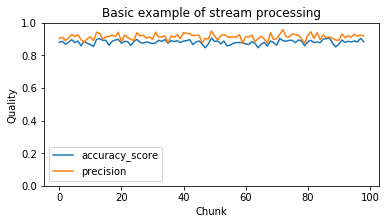

In [131]:
plt.figure(figsize=(6,3))

for m, metric in enumerate(metrics):
    plt.plot(evaluator.scores[0, :, m], label=metric.__name__)

plt.title("Basic example of stream processing")
plt.ylim(0, 1)
plt.ylabel('Quality')
plt.xlabel('Chunk')

plt.legend()

In [132]:
cm = LinearSegmentedColormap.from_list(
    "lokomotiv", colors=[(0.3, 0.7, 0.3), (0.7, 0.3, 0.3)]
)

n_chunks = 100
chunks_plotted = np.linspace(0, n_chunks - 1, 8).astype(int)


def plot_stream(stream, filename="foo", title=""):
    fig, ax = plt.subplots(1, len(chunks_plotted), figsize=(14, 2.5))

    j = 0
    for i in range(n_chunks):
        X, y = stream.get_chunk()
        if i in chunks_plotted:
            ax[j].set_title("Chunk %i" % i)
            ax[j].scatter(X[:, 0], X[:, 1], c=y, cmap=cm, s=10, alpha=0.5)
            ax[j].set_ylim(-4, 4)
            ax[j].set_xlim(-4, 4)
            ax[j].set(aspect="equal")
            j += 1

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.savefig("%s.png" % filename, transparent=True)